In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from statannot import add_stat_annotation
from matplotlib import pyplot as plt

from pltconfig import *

In [2]:
# Endpoint data (12 days) from matched 3mL cultures in 10% CO2 and ambient. 
# Matched cultures in 10% and ambient CO2. 
matched_12day_od_df = pd.read_csv('data/mutant_phenotypes/020420_CCMB1_mutants_endpoint.csv')
mask = matched_12day_od_df.use == True
matched_12day_od_df = matched_12day_od_df[mask].drop('use', axis=1)

mo12d = matched_12day_od_df
highCO2_12day_df = mo12d[mo12d.condition == '10% CO2']
amb_12day_df = mo12d[mo12d.condition == 'ambient']

# Calculate mean values for 12day experiment. 
mean_12day_10pct = highCO2_12day_df.groupby('short_name').mean()
mean_12day_amb = amb_12day_df.groupby('short_name').mean()

std_12day_10pct = highCO2_12day_df.groupby('short_name').std()
std_12day_amb = amb_12day_df.groupby('short_name').std()

mean_12day_amb.head()

,measured_OD,dilution_factor,OD
short_name,,,
DabA1-,0.00000,10,0.0000
cbbL Y72R,0.00000,10,0.0000
cbbQ-,0.47100,10,4.7100
csos2 dNTD,0.00025,10,0.0025
csosCA C173S,0.00000,10,0.0000


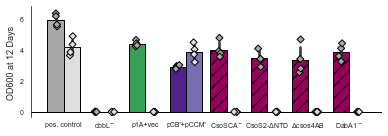

In [11]:
# Combined figure of four day and 12 day growth experiments. 
fig = plt.figure(figsize=(5.5,2))
sns.set_style('white')

neg_colors = (greys[3], greys[1])
pos_colors = (greens[-3], greens[-5])
exp_colors = (purples[-1], purples[-3])
mut_colors = (reddish_purple, reddish)
expected_mut_hatch = '//'
unknown_mut_match = '\\'
colormap = {'pos': neg_colors,
            'p1A K194M/AGFP': neg_colors,
            'full CCM K194M': neg_colors,
            'p1A/AGFP': pos_colors,
            "p1A/pCCM'": pos_colors,
            'full CCM pre': exp_colors,
            'full CCM post': exp_colors,         
            'csosCA C173S': mut_colors,
            'csos2 dNTD': mut_colors,
            'dcsos4AB': mut_colors,
            'DabA1-': mut_colors,
            'cbbL Y72R': mut_colors,
            'cbbQ-': mut_colors,
            'dacRAF': mut_colors}
hatchmap = {'csosCA C173S': expected_mut_hatch,
            'csos2 dNTD': expected_mut_hatch,
            'dcsos4AB': expected_mut_hatch,
            'DabA1-': expected_mut_hatch,
            'cbbL Y72R': expected_mut_hatch,
            'cbbQ-': unknown_mut_match,
            'dacRAF': unknown_mut_match}
hue_order = ['10% CO2', 'ambient']

# 4 day experiment
# Set the order for this panel
order = ['pos', 'p1A K194M/AGFP', 
         'p1A/AGFP', 'full CCM post',
         'csosCA C173S', 'csos2 dNTD', 'dcsos4AB', 'DabA1-', ]
ticknames = ['pos. control', 
             "cbbL$^{-}$", 
             'p1A+vec',
             "pCB'+pCCM'",
             "CsoSCA$^-$", 
             "CsoS2-$\Delta$NTD", 
             "$\Delta$csos4AB",
             "DabA1$^-$"] 
bar_colors = [colormap[o][0] for o in order] + [colormap[o][1] for o in order]
bar_hatches = [hatchmap.get(o) for o in order]*2
bars = sns.barplot(data=mo12d, x='short_name', y='OD', hue='condition',
                   order=order, hue_order=hue_order, 
                   edgecolor='k', linewidth=1)
for c, hatch, bar in zip(bar_colors, bar_hatches, bars.patches):
    bar.set_color(c)
    bar.set_hatch(hatch)
    bar.set_edgecolor('k')
    
hue_pal = {'ambient': greys[1], '10% CO2': greys[3]}
sns.stripplot(data=mo12d, x='short_name', y='OD', hue='condition',
              order=order, hue_order=hue_order,
              marker='D', dodge=0.5, palette=hue_pal, edgecolor='k', linewidth=1)
plt.axhline(0, lw=1, c='k')

plt.legend().set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0, 6.1, 2.0), fontsize=7)
plt.xlabel('')
plt.ylabel('OD600 at 12 Days', fontsize=9)
plt.ylim(-0.35, 6.8)
plt.xlim(-0.8, 7.8)
plt.xticks(np.arange(len(ticknames)), ticknames, fontsize=7, ha='center', va='center')
sns.despine(bottom=True)

plt.tight_layout(h_pad=3)
plt.savefig('fig4/fig4.png', dpi=300)
plt.show()